<a href="https://colab.research.google.com/github/jumbokh/csu1112-class/blob/main/DL/code/%E5%86%92%E9%9A%AA17_Cooper_%E7%9C%9F%E7%9A%84%E6%98%AF%E9%A6%AC%E7%88%BE%E6%BF%9F%E6%96%AF%E5%97%8E%EF%BC%9F%E4%BD%BF%E7%94%A8%E5%90%8D%E9%96%80_CNN_%E5%B9%AB%E5%8A%A9%E8%BE%A8%E8%AD%98%EF%BC%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 1. 讀入資料集

In [4]:
!wget --no-check-certificate \
    https://nbviewer.org/github/yenlung/Python-AI-Book/tree/main/dataset/Cooper.zip \
    -O /content/Cooper.zip

--2023-05-06 07:54:47--  https://nbviewer.org/github/yenlung/Python-AI-Book/tree/main/dataset/Cooper.zip
Resolving nbviewer.org (nbviewer.org)... 151.101.129.91, 151.101.193.91, 151.101.1.91, ...
Connecting to nbviewer.org (nbviewer.org)|151.101.129.91|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /github/yenlung/Python-AI-Book/tree/main/dataset/Cooper.zip/ [following]
--2023-05-06 07:54:47--  https://nbviewer.org/github/yenlung/Python-AI-Book/tree/main/dataset/Cooper.zip/
Reusing existing connection to nbviewer.org:443.
HTTP request sent, awaiting response... 302 Found
Location: /github/yenlung/Python-AI-Book/blob/main/dataset/Cooper.zip [following]
--2023-05-06 07:54:49--  https://nbviewer.org/github/yenlung/Python-AI-Book/blob/main/dataset/Cooper.zip
Reusing existing connection to nbviewer.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 1023238 (999K) [application/zip]
Saving to: ‘/content/Cooper.zip’

/content/Cooper.zip 100%[=======

In [5]:
import os
import zipfile

local_zip = '/content/Cooper.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
cooper = [f"cooper0{i}.jpg" for i in range(1, 7)]

### 2. 讀入一隻 Cooper 試試

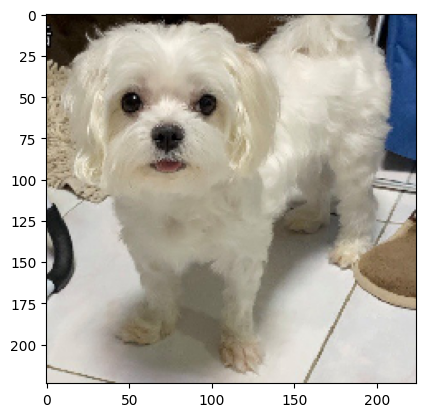

In [7]:
img = load_img(cooper[2], target_size = (224, 224))
plt.imshow(img);

### 3. 讀入 ResNet50 及 labels

In [8]:
with open('imagenet-classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [9]:
labels[:10]

['tench 鯉魚類淡水魚',
 'goldfish 金魚',
 'great white shark 大白鯊',
 'tiger shark 虎鯊',
 'hammerhead 鎚頭鯊',
 'electric ray 電魟',
 'stingray 魟魚',
 'cock 公雞',
 'hen 母雞',
 'ostrich 鴕鳥']

In [10]:
resnet = ResNet50()

102967424/102967424 [==============================] - 0s 0us/step


轉換圖片的尺寸

In [11]:
x = img_to_array(img).reshape(1, 224, 224, 3)

進行 ResNet 版的預處理

In [12]:
inp = preprocess_input(x)

In [13]:
y_pred = np.argmax(resnet.predict(inp), axis=-1)[0]
print(f"ResNet 覺得是 {labels[y_pred]}")

1/1 [==============================] - 8s 8s/step
ResNet 覺得是 Maltese dog 馬爾濟斯犬


### 4. 做成 Web App!

In [14]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0

In [15]:
import gradio as gr

In [16]:
def classify_image(inp):
    inp = inp.reshape((-1, 224, 224, 3))
    inp = preprocess_input(inp)
    prediction = resnet.predict(inp).flatten()
    return {labels[i]: float(prediction[i]) for i in range(1000)}

In [17]:
image = gr.Image(shape=(224, 224), label="請上傳一張圖片")
label = gr.Label(num_top_classes=3, label="模型猜測的答案是：")

In [18]:
sample_images = [[f'cooper0{i}.jpg'] for i in range(1, 7)]

In [19]:
gr.Interface(fn=classify_image, 
             inputs=image, 
             outputs=label, 
             examples=sample_images).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://90bf06a5b7111d58bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
